<font size="5">**PROJEKT - ALGORYTMY UCZENIA MASZYNOWEGO**</font>

--> [Link do Github'a](https://github.com/wiktor-kawa/Algorytmy-Uczenia-Maszynowego---Projekt) <--

"Algorytmy Uczenia Maszynowego" K05-02f

Podczas projektu realizowany jest algorytm klasyfikacji stanu akceptowalności pojazdów w zależności od kilku atrybutów związanych zarówno z ceną jak i charakterystyką techniczą samochodów. Na podstawie danych takich jak koszt utrzymania, wielkość bagażnika czy klasa bezpieczeństwa algorytm ma za zadanie przyporządkować określoną etykietę, np. gdy samochód jest drogi w utrzymaniu, ma mały bagażnik i nie jest wystarczająco bezpieczny należy zaklasyfikować go jako "nieakceptowalny".

Baza danych, którą wykorzystano w projekcie można znaleźć pod poniższym linkiem: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Głównym celem projektu jest zapoznanie się i zrozumienie podstaw algorytmów uczenia maszynowego. Podczas projektu należy zwizualizować zbiór danych, zaimplementować trzy algorytmy uczenia maszynowego, dodatkowo spróbować je połączyć, wykreślić krzywe uczenia oraz wyliczyć podstawowe miary jakości zaimplementowanych algorytmów. 

Projekt wykonano przy pomocy narzędzia "jupyter-lab".

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Załadowanie danych do programu**

In [2]:
df = pd.read_csv('cars.data', header = None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

**OPIS CECH**<br>
*buying - cena zakupu samochodu*<br>
*maint - cena utrzymania samochodu*<br>
*doors - liczba drzwi*<br>
*persons - pojemność w przeliczeniu na liczbę osób*<br>
*lub_boot - wielkość bagażnika*<br>
*safety - szacunkowe bezpieczeństwo samochodu*<br>

**OPIS ETYKIET - STAN AKCEPTOWALNOŚCI POJAZDU**<br>
*unacc - unacceptable*<br>
*acc - acceptable*<br>
*good - good*<br>
*vgood - very good*<br>


**Wyświetlenie rozmiaru i początkowej części bazy danych**

In [3]:
print(df.shape)
df.head()

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


**Zliczanie samochodów o określonych atrybutach oraz etykiet**

In [4]:
i = 0
liczba_vhigh = 0
liczba_unacc = 0
while i < df.shape[0]: 
    if (df['buying'][i] == "vhigh") & (df['maint'][i] == "vhigh"): #zliczanie liczby aut o wysokiej cenie i drogich w utrymaniu
        liczba_vhigh = liczba_vhigh + 1
    if df['class'][i] == "vgood":
        liczba_unacc = liczba_unacc + 1
    i = i + 1

print('Liczba aut o wysokiej cenie i drogich w utrzymaniu - ' + str(liczba_vhigh))
print("Liczba aut z etykietą 'unacceptable' - " + str(liczba_unacc))

Liczba aut o wysokiej cenie i drogich w utrzymaniu - 108
Liczba aut z etykietą 'unacceptable' - 65


**Wyznaczenie wymiarów bazy danych**

In [5]:
data = df.values
X = data[:,:-1]      #zmienna X - zbiór wektorów cech
y = data[:,-1]       #zmienna y - zbiór etykiet dla obiektów znajdujących się w zbiorze
print("Wymiary tablic X i y:")
print(X.shape, y.shape)
print()
print("Zbiór wektorów cech:")
print(X)
print()
print("Zbiór etykiet:")
print(y)

Wymiary tablic X i y:
(1728, 6) (1728,)

Zbiór wektorów cech:
[['vhigh' 'vhigh' '2' '2' 'small' 'low']
 ['vhigh' 'vhigh' '2' '2' 'small' 'med']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high']
 ...
 ['low' 'low' '5more' 'more' 'big' 'low']
 ['low' 'low' '5more' 'more' 'big' 'med']
 ['low' 'low' '5more' 'more' 'big' 'high']]

Zbiór etykiet:
['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


**KONWERSJA ATRYBUTÓW TYPU STRING NA INT**

In [6]:
i=0; j=0; k=0; l=0; m=0; n=0; o=0

labels, uniques = pd.factorize(['low', 'med', 'high', 'vhigh'])
labels_door, uniques_door = pd.factorize(['2', '3', '4', '5more'])
labels_persons, uniques_persons = pd.factorize(['2', '4', 'more'])
labels_lug, uniques_lug = pd.factorize(['small', 'med', 'big'])
labels_class, uniques_class = pd.factorize(['unacc', 'acc', 'good', 'vgood'])

#zmiana atrybutów typu string na int w bazie danych
while i < y.shape[0]:      #->etykiety (unacc = 0, acc = 1, good = 2, vgood = 3)
    if y[i] == 'unacc':
        y[i] = labels_class[0]
    elif y[i] == 'acc':
        y[i] = labels_class[1]
    elif y[i] == 'good':
        y[i] = labels_class[2]
    elif y[i] == 'vgood':
        y[i] = labels_class[3]
    i = i + 1
    
while j < X.shape[0]:    #-> atrybut BUYING (low = 0, med = 1, high = 2, vhigh = 3)
    if X[j][0] == 'low':
        X[j][0] = labels[0]
    elif X[j][0] == 'med':
        X[j][0] = labels[1]
    elif X[j][0] == 'high':
        X[j][0] = labels[2]
    elif X[j][0] == 'vhigh':
        X[j][0] = labels[3]
    j = j + 1
    
while k < X.shape[0]:    #-> atrybut MAINT (low = 0, med = 1, high = 2, vhigh = 3)
    if X[k][1] == 'low':
        X[k][1] = labels[0]
    elif X[k][1] == 'med':
        X[k][1] = labels[1]
    elif X[k][1] == 'high':
        X[k][1] = labels[2]
    elif X[k][1] == 'vhigh':
        X[k][1] = labels[3]
    k = k + 1
    
while l < X.shape[0]:    #-> atrybut DOORS (2 = 0, 3 = 1, 4 = 2, 5more = 3)
    if X[l][2] == '2':
        X[l][2] = labels_door[0]
    elif X[l][2] == '3':
        X[l][2] = labels_door[1]
    elif X[l][2] == '4':
        X[l][2] = labels_door[2]
    elif X[l][2] == '5more':
        X[l][2] = labels_door[3]
    l = l + 1
    
while m < X.shape[0]:    #-> atrybut PERSONS (2 = 0, 4 = 1, more = 2)
    if X[m][3] == '2':
        X[m][3] = labels_persons[0]
    elif X[m][3] == '4':
        X[m][3] = labels_persons[1]
    elif X[m][3] == 'more':
        X[m][3] = labels_persons[2]
    m = m + 1
    
while n < X.shape[0]:    #-> atrybut LUG_BOOT (small = 0, med = 1, big = 2)
    if X[n][4] == 'small':
        X[n][4] = labels_lug[0]
    elif X[n][4] == 'med':
        X[n][4] = labels_lug[1]
    elif X[n][4] == 'big':
        X[n][4] = labels_lug[2]
    n = n + 1
    
while o < X.shape[0]:    #-> atrybut SAFETY (low = 0, med = 1, high = 2)
    if X[o][5] == 'low':
        X[o][5] = labels[0]
    elif X[o][5] == 'med':
        X[o][5] = labels[1]
    elif X[o][5] == 'high':
        X[o][5] = labels[2]
    o = o + 1

print(X)

[[3 3 0 0 0 0]
 [3 3 0 0 0 1]
 [3 3 0 0 0 2]
 ...
 [0 0 3 2 2 0]
 [0 0 3 2 2 1]
 [0 0 3 2 2 2]]


**PODZIAŁ DANYCH NA ZBIÓR TRENINGOWY I TESTOWY**

In [7]:
from sklearn import model_selection
podzial = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)  #80% danych - zbiór treningowy, 20% danych - zbiór testowy
X_train, X_test, y_train, y_test = podzial
print (X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)    #wymiary zbiorów testowych i treningowych

X_train=X_train.astype('int')
y_train=y_train.astype('int')
X_test=X_test.astype('int')
y_test=y_test.astype('int')

(1382, 6) (1382,)
(346, 6) (346,)


**WIZUALIZACJA DANYCH --- WYKREŚLANIE HISTOGRAMÓW**

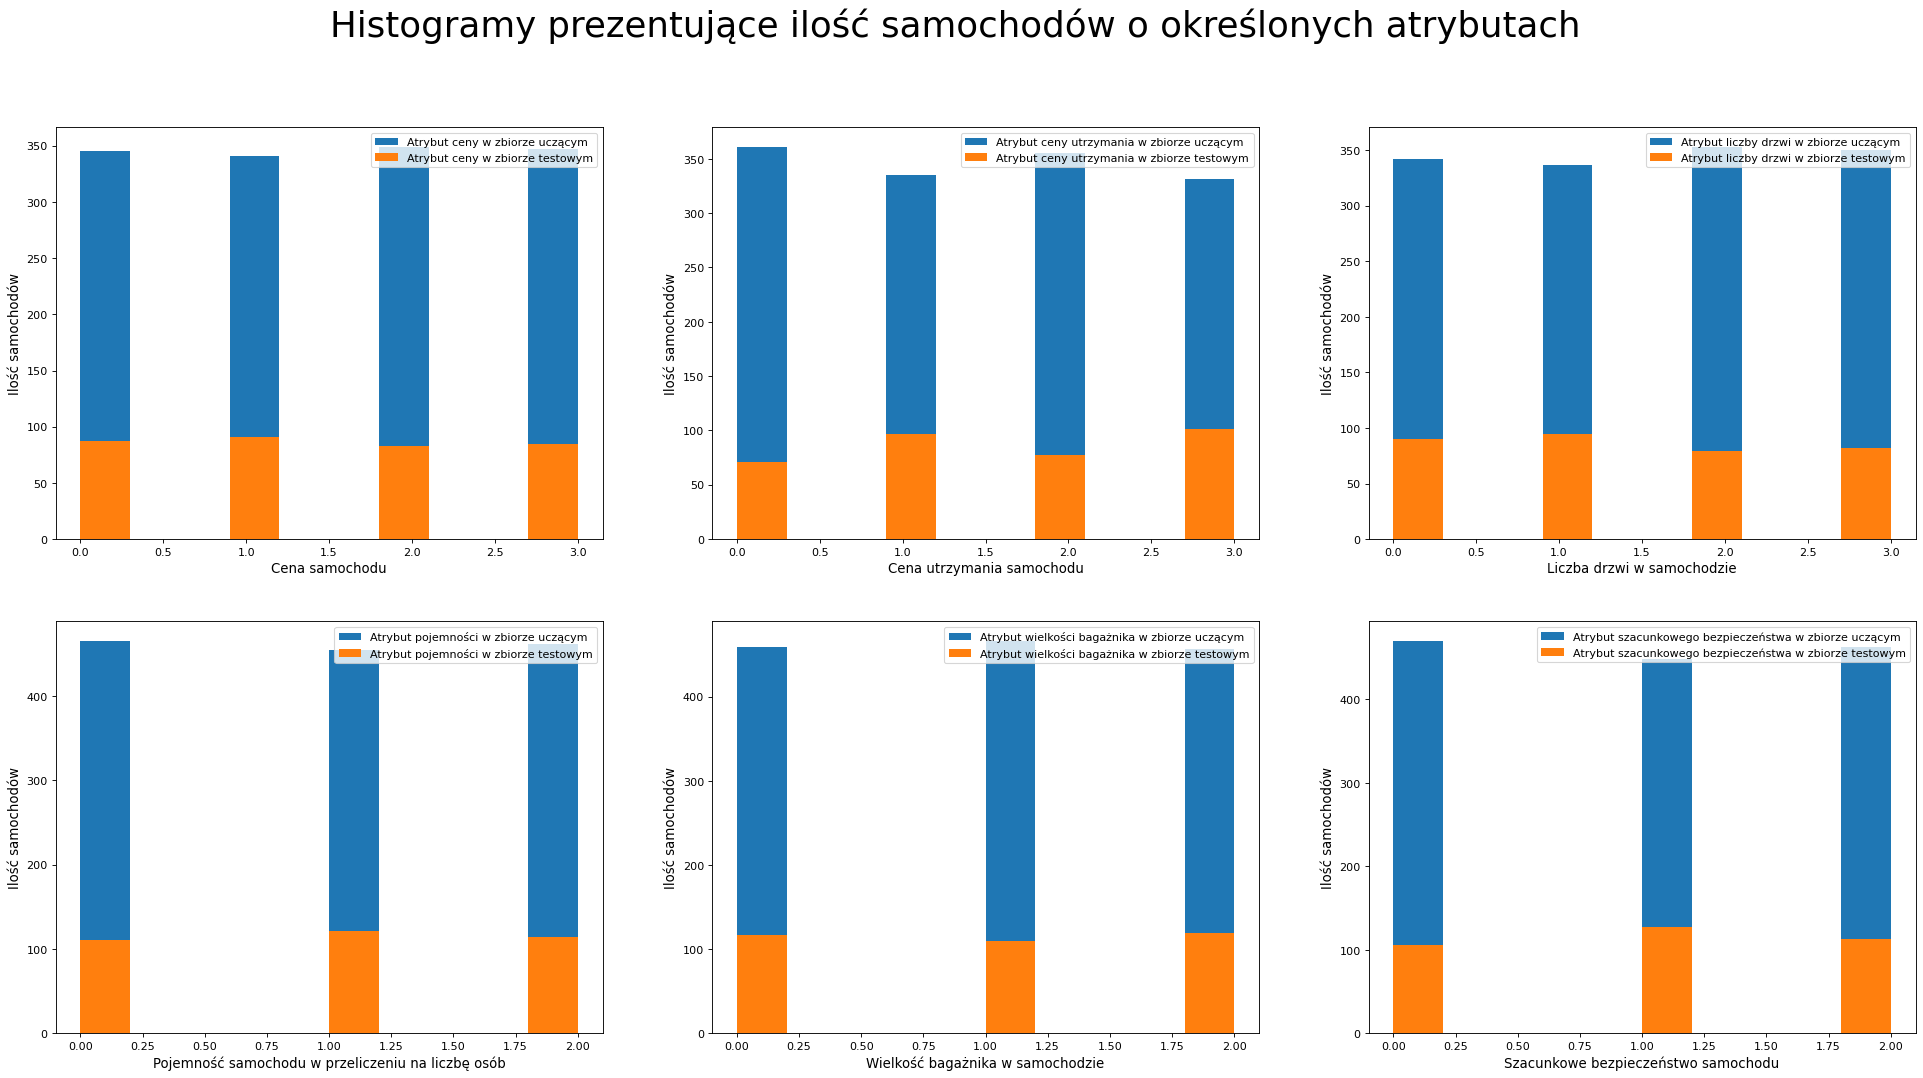

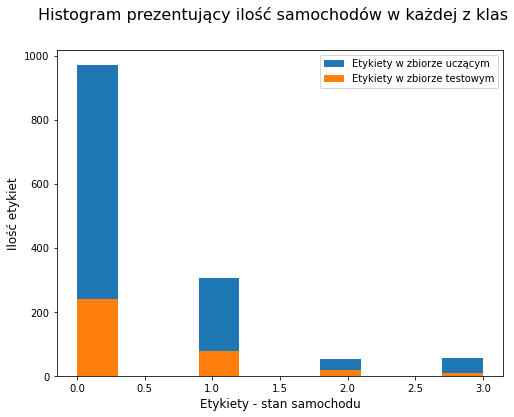

In [8]:
#wykreślanie histogramów atrybutów z podziałem na dane treningowe/testowe
from matplotlib.pyplot import figure
buying_train = X_train[:,0]
buying_test = X_test[:,0]
maint_train = X_train[:,1]
maint_test = X_test[:,1]
doors_train = X_train[:,2]
doors_test = X_test[:,2]
persons_train = X_train[:,3]
persons_test = X_test[:,3]
lug_boot_train = X_train[:,4]
lug_boot_test = X_test[:,4]
safety_train = X_train[:,5]
safety_test = X_test[:,5]

fig = plt.figure(figsize=(30, 15), dpi = 80)
fig.suptitle('Histogramy prezentujące ilość samochodów o określonych atrybutach', fontsize = 32)

fig.add_subplot(2, 3, 1)
plt.hist(buying_train)
plt.hist(buying_test)
plt.xlabel("Cena samochodu", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut ceny w zbiorze uczącym","Atrybut ceny w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 2)
plt.hist(maint_train)
plt.hist(maint_test)
plt.xlabel("Cena utrzymania samochodu", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut ceny utrzymania w zbiorze uczącym","Atrybut ceny utrzymania w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 3)
plt.hist(doors_train)
plt.hist(doors_test)
plt.xlabel("Liczba drzwi w samochodzie", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut liczby drzwi w zbiorze uczącym","Atrybut liczby drzwi w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 4)
plt.hist(persons_train)
plt.hist(persons_test)
plt.xlabel("Pojemność samochodu w przeliczeniu na liczbę osób", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut pojemności w zbiorze uczącym","Atrybut pojemności w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 5)
plt.hist(lug_boot_train)
plt.hist(lug_boot_test)
plt.xlabel("Wielkość bagażnika w samochodzie", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut wielkości bagażnika w zbiorze uczącym","Atrybut wielkości bagażnika w zbiorze testowym"], loc = 'upper right')

fig.add_subplot(2, 3, 6)
plt.hist(safety_train)
plt.hist(safety_test)
plt.xlabel("Szacunkowe bezpieczeństwo samochodu", fontsize = 12)
plt.ylabel("Ilość samochodów", fontsize = 12)
plt.legend(["Atrybut szacunkowego bezpieczeństwa w zbiorze uczącym","Atrybut szacunkowego bezpieczeństwa w zbiorze testowym"], loc = 'upper right')

#wykreślenie histogramu dla etykiet
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Histogram prezentujący ilość samochodów w każdej z klas', fontsize = 16)

plt.hist(y_train)
plt.hist(y_test)
plt.xlabel("Etykiety - stan samochodu", fontsize = 12)
plt.ylabel("Ilość etykiet", fontsize = 12)
plt.legend(["Etykiety w zbiorze uczącym","Etykiety w zbiorze testowym"])

**IMPLEMENTACJA FUNKCJI ODPOWIADAJĄCEJ ZA WYŚWIETLANIE METRYK DLA ALGORYTMÓW**

In [9]:
from sklearn import metrics
import warnings

#Funkcja pozwalająca określać podstawowe metryki - accuracy, confusion_matrix, classification_report
def metrics_aum(algorithm, X_test, y_test, y_predicted):
    
    print('METRYKI NA ZBIORZE TESTOWYM DLA -> ' + str(algorithm))
    print('-----------------------------')
    
    #macierz pomyłek                                                                                 # Macierz pomyłek - pozwala na określenie skuteczności algorytmu uczenia. Macierz kwadratowa, w której:
    confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)                                 #True positive - poprawnie sklasyfikowane próbki należące do jednej z klas
                                                                                                     #False positive - niepoprawnie sklasyfikowane próbki (np. powinny należeć do klasy 1, a należą do 0)
    fig, ax = plt.subplots(figsize = (2.5, 2.5))                                                     #True negative - poprawnie sklasyfikowane próbki należące do drugiej z klas
    ax.matshow(confusion_matrix, cmap = plt.cm.Blues, alpha = 0.3)                                   #False negative - niepoprawnie sklasyfikowane próbki (np. powinny należeć do klasy 0, a należą do 1)
    
    for i in range (confusion_matrix.shape[0]):
        for j in range (confusion_matrix.shape[1]):
            ax.text(x = j, y = i, s = confusion_matrix[i, j], va = 'center', ha = 'center')
            
    plt.xlabel('Przewidywana etykieta')
    plt.ylabel('Rzeczywista etykieta')
    plt.title("MACIERZ POMYŁEK (CONFUSION MATRIX)")
    plt.show()
    print('----------------------------')

    print('CLASSIFICATION REPORT')
    classification_report = metrics.classification_report(y_test, y_predicted)            #recall - czułość - prawdopodobieństwo, że klasyfikacja będzie poprawna pod warunkiem, że przypadek jest pozytywny
    print(classification_report)                                                          #precision - precyzja - Jeśli wynik testu jest pozytywny, jakie jest prawdopodobieństwo, że osoba badana jest chora?
    print('-----------------------------')                                                #F1-score - średnia harminiczna z precyzji i czułości
                                                                                          #Accuracy - skuteczność - prawdopodobieństwo prawidłowej klasyfikacji
    #skuteczność algorytmu
    accuracy = metrics.accuracy_score(y_test, y_predicted)
    print('ACCURACY')
    print(accuracy)
    print('-----------------------------')
    
    #prawdopodobieństwo przypisania do próbki każdej z etykiet dla pierwszych 3 próbek
    proba = algorithm.predict_proba(X_test[:3])
    print('PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK')
    print(proba)
    print('-----------------------------')
 
    print("Liczba błędnie sklasyfikowanych samochodów ze wszystkich %d w zbiorze testowym wynosi : %d"
    %(X_test.shape[0], (y_test != y_predicted).sum()))
    print('-----------------------------')
    print()

<font size="5"> **OPIS UŻYTYCH ALGORYTMÓW**</font><br>
**I. Drzewa decyzyjne** - nieparametryczna nadzorowana metoda uczenia maszynowego wykorzystywana zarówno do problemów klasyfikacji jak i regresji. Celem tej metody jest stworzenie modelu, który przewiduje wartość etykiety, ucząc się prostych reguł decyzyjnych na podstawie danych cech. Zaletami drzew decyzyjnych jest niewątpliwie prostota zrozumienia i implementacji oraz fakt, że nie wymagają wcześniejszego, specjalnego przygotowania danych. Z drugiej strony są one niestabilne, gdyż niewielka zmiana danych może znacząco wpłynąć na wygląd drzewa.<br>
**II. K Najbliższych Sąsiadów** - często określany mianem leniwego klasyfikatora, ponieważ technicznie nie trenuje on modelu, a prognozuje, że obserwacja jest klasą, do której zalicza się największa liczba k najbliższych obserwacji. Jest to jeden z najczęściej używanych algorytmów w uczeniu nadzorowanym. Im więcej jest danych uczących, tym dokładniej działa algorytm, ale rosną jednak nakłady obliczeniowe i wymagania odnośnie pamięci.<br>
**III. MLP (Perceptron wielowartswowy)** - jeden z najpopularniejszych typów sieci neuronowych. Zwykle składa się z jednej warstwy wejściowej, kilku warstw ukrytych i jednej warstwy wyjściowej. Może on być wykorzystywany do zbiorów danych nieliniowo separowalnych (w przeciwieństwie do perceptronu jednowarstwowego). Jego struktura polega na tym, że wyjścia neuronów warstwy poprzedniej tworzą wektor podawany na wejście każdego z neuronów warstwy następnej. W ramach jednej warstwy neurony nie mają połaczeń między sobą.<br>

<font size="5">**I ALGORYTM --- DRZEWA DECYZYJNE**</font>

CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: 
0:00:00.001858
-----------------------------
METRYKI NA ZBIORZE TESTOWYM DLA -> DecisionTreeClassifier(max_depth=2, random_state=0)
-----------------------------


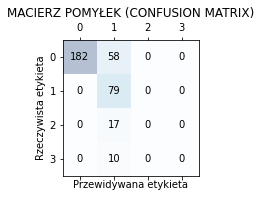

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       240
           1       0.48      1.00      0.65        79
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        10

    accuracy                           0.75       346
   macro avg       0.37      0.44      0.38       346
weighted avg       0.80      0.75      0.75       346

-----------------------------
ACCURACY
0.7543352601156069
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[0.31788079 0.50496689 0.08609272 0.0910596 ]
 [0.31788079 0.50496689 0.08609272 0.0910596 ]
 [1.         0.         0.         0.        ]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 85
-----------------------------



D:\Anaconda\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.tree import DecisionTreeClassifier
import datetime

clf_tree = DecisionTreeClassifier(max_depth = 2, random_state = 0)    #deklaracja klasyfikatora

start_clf_tree = datetime.datetime.now()                              #zapisanie czasu przed rozpoczęciem uczenia
clf_tree.fit(X_train, y_train)                                        #proces uczenia algorytmu
duration_clf_tree = datetime.datetime.now() - start_clf_tree          #określenie czasu procesu uczenia

y_predicted_tree = clf_tree.predict(X_test)

print("CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: ")
print(duration_clf_tree)
print('-----------------------------')

metrics_aum(clf_tree, X_test, y_test, y_predicted_tree)

<font size="5">**I ALGORYTM --- DRZEWA DECYZYJNE --- DOBÓR OPTYMALNYCH HIPERPARAMETRÓW W CELU ZWIĘKSZENIA SKUTECZNOŚCI UCZENIA**</font>

Najlepsze hiperparametry to: 
{'criterion': 'gini', 'max_depth': 6}

CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: 
0:00:00.001000
-----------------------------
METRYKI NA ZBIORZE TESTOWYM DLA -> DecisionTreeClassifier(max_depth=6)
-----------------------------


D:\Anaconda\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\envs\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\venv\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\Anaconda\envs\venv\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFa

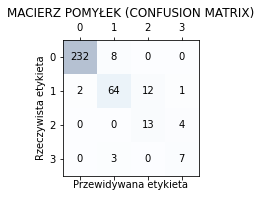

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       240
           1       0.85      0.81      0.83        79
           2       0.52      0.76      0.62        17
           3       0.58      0.70      0.64        10

    accuracy                           0.91       346
   macro avg       0.74      0.81      0.77       346
weighted avg       0.92      0.91      0.92       346

-----------------------------
ACCURACY
0.9132947976878613
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[0.01960784 0.78431373 0.         0.19607843]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 30
-----------------------------



In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {                                                 #wskazanie, które hiperparametry i jakie ich wartości mają być sprawdzone w celu wyznaczenia najlepszej ich kombinacji.
    "max_depth": [2, 3, 4, 5, 6, 7],
    "criterion": ['gini', 'entropy', 'log_loss'],
}

search_tree = GridSearchCV(clf_tree, param_grid, n_jobs=-1)    #funkcja odpowiadająca za wyznaczenie optymalnych hiperparametrów dla algorytmu clf_tree. Zaangażowano wszystkie rdzenie procesora.
search_tree.fit(X_train, y_train)
print("Najlepsze hiperparametry to: ")
print(search_tree.best_params_)
print()

clf_tree2 = DecisionTreeClassifier(max_depth = search_tree.best_params_.setdefault("max_depth"), criterion = search_tree.best_params_.setdefault("criterion"))  #wyuczenie algorytmu z dopasowanymi hiperparamtrami

start_clf_tree2 = datetime.datetime.now()
clf_tree2.fit(X_train, y_train)
duration_clf_tree2 = datetime.datetime.now() - start_clf_tree2


y_predicted_tree2 = clf_tree2.predict(X_test)

print("CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: ")
print(duration_clf_tree2)
print('-----------------------------')

metrics_aum(clf_tree2, X_test, y_test, y_predicted_tree2)

<font size="5">**II ALGORYTM --- K NAJBLIŻSZYCH SĄSIADÓW**</font>

CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: 
0:00:00.002730
-----------------------------
METRYKI NA ZBIORZE TESTOWYM DLA -> KNeighborsClassifier(n_neighbors=2)
-----------------------------


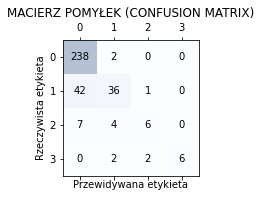

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       240
           1       0.82      0.46      0.59        79
           2       0.67      0.35      0.46        17
           3       1.00      0.60      0.75        10

    accuracy                           0.83       346
   macro avg       0.83      0.60      0.68       346
weighted avg       0.82      0.83      0.80       346

-----------------------------
ACCURACY
0.8265895953757225
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[0.5 0.5 0.  0. ]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 60
-----------------------------



In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors = 2) #default - n_neighbors = 5, weights = 'uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'

start_clf_knn = datetime.datetime.now()
clf_knn.fit(X_train, y_train)
duration_clf_knn = datetime.datetime.now() - start_clf_knn

y_predicted_knn = clf_knn.predict(X_test)

print("CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: ")
print(duration_clf_knn)
print('-----------------------------')

metrics_aum(clf_knn, X_test, y_test, y_predicted_knn)

<font size="5">**II ALGORYTM --- K NAJBLIŻSZYCH SĄSIADÓW --- DOBÓR OPTYMALNYCH HIPERPARAMETRÓW W CELU ZWIĘKSZENIA SKUTECZNOŚCI UCZENIA**</font>

Najlepsze hiperparametry to: 
{'n_neighbors': 7, 'weights': 'distance'}

CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: 
0:00:00.001952
-----------------------------
METRYKI NA ZBIORZE TESTOWYM DLA -> KNeighborsClassifier(n_neighbors=7, weights='distance')
-----------------------------


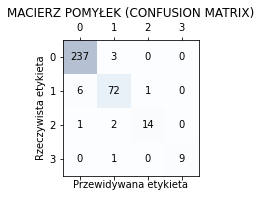

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       240
           1       0.92      0.91      0.92        79
           2       0.93      0.82      0.87        17
           3       1.00      0.90      0.95        10

    accuracy                           0.96       346
   macro avg       0.96      0.91      0.93       346
weighted avg       0.96      0.96      0.96       346

-----------------------------
ACCURACY
0.9595375722543352
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[0.6732731  0.3267269  0.         0.        ]
 [0.85714286 0.14285714 0.         0.        ]
 [1.         0.         0.         0.        ]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 14
-----------------------------



In [15]:
param_grid = {
    "n_neighbors": [2, 3, 4, 5, 6, 7],
    "weights": ['uniform', 'distance'],
}

search_knn = GridSearchCV(clf_knn, param_grid, n_jobs=-1)
search_knn.fit(X_train, y_train)
print("Najlepsze hiperparametry to: ")
print(search_knn.best_params_)
print()

clf_knn2 = KNeighborsClassifier(n_neighbors = search_knn.best_params_.setdefault("n_neighbors"),
                                weights = search_knn.best_params_.setdefault("weights"))

start_clf_knn2 = datetime.datetime.now()
clf_knn2.fit(X_train, y_train)
duration_clf_knn2 = datetime.datetime.now() - start_clf_knn2

y_predicted_knn2 = clf_knn2.predict(X_test)

print("CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: ")
print(duration_clf_knn2)
print('-----------------------------')

metrics_aum(clf_knn2, X_test, y_test, y_predicted_knn2)

<font size="5">**III ALGORYTM --- MLP (PERCEPTRON WIELOWARSTWOWY)**</font>

CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: 
0:00:01.013542
-----------------------------
METRYKI NA ZBIORZE TESTOWYM DLA -> MLPClassifier(alpha=5, max_iter=500)
-----------------------------


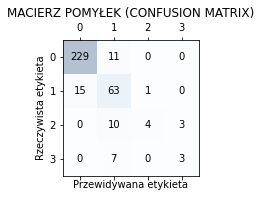

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       240
           1       0.69      0.80      0.74        79
           2       0.80      0.24      0.36        17
           3       0.50      0.30      0.37        10

    accuracy                           0.86       346
   macro avg       0.73      0.57      0.61       346
weighted avg       0.86      0.86      0.85       346

-----------------------------
ACCURACY
0.8641618497109826
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[4.98596285e-01 4.44159559e-01 3.14387994e-02 2.58053560e-02]
 [8.99618672e-01 9.78647176e-02 1.71033364e-03 8.06276952e-04]
 [9.96788278e-01 3.04784211e-03 1.28807368e-04 3.50728468e-05]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 47
-----------------------------



In [16]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(alpha = 5, max_iter = 500)

start_clf_mlp = datetime.datetime.now()
clf_mlp.fit(X_train, y_train)
duration_clf_mlp = datetime.datetime.now() - start_clf_mlp

y_predicted_mlp = clf_mlp.predict(X_test)

print("CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: ")
print(duration_clf_mlp)
print('-----------------------------')

metrics_aum(clf_mlp, X_test, y_test, y_predicted_mlp)

<font size="5">**III ALGORYTM --- MLP (PERCEPTRON WIELOWARSTWOWY) --- DOBÓR OPTYMALNYCH HIPERPARAMETRÓW W CELU ZWIĘKSZENIA SKUTECZNOŚCI UCZENIA**</font>

D:\Anaconda\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Najlepsze hiperparametry to: 
{'activation': 'relu', 'alpha': 0.0001, 'max_iter': 1000}

CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: 
0:00:02.491647
-----------------------------
METRYKI NA ZBIORZE TESTOWYM DLA -> MLPClassifier(max_iter=1000)
-----------------------------


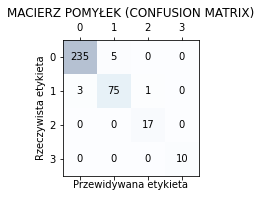

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       240
           1       0.94      0.95      0.94        79
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00        10

    accuracy                           0.97       346
   macro avg       0.97      0.98      0.97       346
weighted avg       0.97      0.97      0.97       346

-----------------------------
ACCURACY
0.9739884393063584
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[5.30486201e-01 4.69513796e-01 9.54268373e-10 2.06008304e-09]
 [9.94314785e-01 5.68521518e-03 2.68548431e-17 1.06211522e-17]
 [9.99998030e-01 1.96991365e-06 1.01410762e-16 6.54190150e-20]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 9
-----------------------------



In [17]:
param_grid = {
    "alpha": [1e-4, 1e-3],
    "max_iter": [1000, 1500],
    "activation": ['tanh', 'relu'],  
}

search_mlp = GridSearchCV(clf_mlp, param_grid, n_jobs = -1)
search_mlp.fit(X_train, y_train)
print("Najlepsze hiperparametry to: ")
print(search_mlp.best_params_)
print()

clf_mlp2 = MLPClassifier(alpha = search_mlp.best_params_.setdefault("alpha"), max_iter = search_mlp.best_params_.setdefault("max_iter"), activation = search_mlp.best_params_.setdefault("activation"))

start_clf_mlp2 = datetime.datetime.now()
clf_mlp2.fit(X_train, y_train)
duration_clf_mlp2 = datetime.datetime.now() - start_clf_mlp2

y_predicted_mlp2 = clf_mlp2.predict(X_test)

print("CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: ")
print(duration_clf_mlp2)
print('-----------------------------')

metrics_aum(clf_mlp2, X_test, y_test, y_predicted_mlp2)

<font size="5">**IV ALGORYTM --- POŁĄCZENIE WSZYSTKICH TRZECH ALGORYTMÓW --- STACKING CLASSIFIER**</font>

D:\Anaconda\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: 
0:00:19.965387
-----------------------------
METRYKI NA ZBIORZE TESTOWYM DLA -> StackingClassifier(estimators=[('clf_tree2',
                                DecisionTreeClassifier(max_depth=6)),
                               ('clf_knn2',
                                KNeighborsClassifier(n_neighbors=7,
                                                     weights='distance')),
                               ('clf_mlp2', MLPClassifier(max_iter=1000))],
                   final_estimator=LogisticRegression())
-----------------------------


D:\Anaconda\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


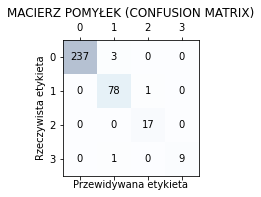

----------------------------
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       240
           1       0.95      0.99      0.97        79
           2       0.94      1.00      0.97        17
           3       1.00      0.90      0.95        10

    accuracy                           0.99       346
   macro avg       0.97      0.97      0.97       346
weighted avg       0.99      0.99      0.99       346

-----------------------------
ACCURACY
0.9855491329479769
-----------------------------
PREDICT PROBABILITY DLA PIERWSZYCH 3 PRÓBEK
[[2.57957518e-01 7.10146862e-01 1.51596993e-02 1.67359207e-02]
 [9.97839378e-01 1.32163892e-03 4.94668770e-04 3.44314075e-04]
 [9.98826944e-01 6.28304304e-04 3.31013552e-04 2.13738220e-04]]
-----------------------------
Liczba błędnie sklasyfikowanych samochodów ze wszystkich 346 w zbiorze testowym wynosi : 5
-----------------------------



In [19]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('clf_tree2', clf_tree2),
    ('clf_knn2', clf_knn2),
    ('clf_mlp2', clf_mlp2)]

stack_model = StackingClassifier(estimators = estimator_list, final_estimator = LogisticRegression()) #połączenie wcześniej zaimplementowanych algorytmów - wykorzystanie danych wyjściowych z każdego z algorytmów i użycie
                                                                                                      #ich jako dane wejściowe do estymatora jakim jest Logistic Regression
start_stack_model = datetime.datetime.now()
stack_model.fit(X_train, y_train)
duration_stack_model = datetime.datetime.now() - start_stack_model

y_predicted_stack = stack_model.predict(X_test)

print("CZAS DZIAŁANIA ALGORYTMU UCZĄCEGO: ")
print(duration_stack_model)
print('-----------------------------')

metrics_aum(stack_model, X_test, y_test, y_predicted_stack)

**DEFINICJA FUNKCJI OKREŚLAJĄCEJ ZALEŻNOŚĆ METRYK OD HIPERPARAMETRÓW**

In [20]:
def metrics_visual(algorithm, X_test, y_test, y_predicted):
    
    accuracy = metrics.accuracy_score(y_test, y_predicted)
 
    probki_testowy = X_test.shape[0]
    bledne_testowy = y_test != y_predicted.sum()
    
    print("Dla: " + str(algorithm))
    print("-Skuteczność: " + str(accuracy))
    print("-Błędnie sklasyfikowanych z %d: %d"
    %(X_test.shape[0], (y_test != y_predicted).sum()))
    print()

**WYWOŁANIE FUNKCJI OKREŚLAJĄCEJ ZALEŻNOŚĆ METRYK OD HIPERPARAMETRÓW**

In [21]:
metrics_visual(clf_tree, X_test, y_test, y_predicted_tree)
metrics_visual(clf_tree2, X_test, y_test, y_predicted_tree2)
metrics_visual(clf_knn, X_test, y_test, y_predicted_knn)
metrics_visual(clf_knn2, X_test, y_test, y_predicted_knn2)
metrics_visual(clf_mlp, X_test, y_test, y_predicted_mlp)
metrics_visual(clf_mlp2, X_test, y_test, y_predicted_mlp2)

Dla: DecisionTreeClassifier(max_depth=2, random_state=0)
-Skuteczność: 0.7543352601156069
-Błędnie sklasyfikowanych z 346: 85

Dla: DecisionTreeClassifier(max_depth=6)
-Skuteczność: 0.9132947976878613
-Błędnie sklasyfikowanych z 346: 30

Dla: KNeighborsClassifier(n_neighbors=2)
-Skuteczność: 0.8265895953757225
-Błędnie sklasyfikowanych z 346: 60

Dla: KNeighborsClassifier(n_neighbors=7, weights='distance')
-Skuteczność: 0.9595375722543352
-Błędnie sklasyfikowanych z 346: 14

Dla: MLPClassifier(alpha=5, max_iter=500)
-Skuteczność: 0.8641618497109826
-Błędnie sklasyfikowanych z 346: 47

Dla: MLPClassifier(max_iter=1000)
-Skuteczność: 0.9739884393063584
-Błędnie sklasyfikowanych z 346: 9



**PORÓWNIANIE ALGORYTMÓW Z OPTYMALNYMI HIPERPARAMETRAMI I ALGORYTMU ŁĄCZONEGO**

In [22]:
from sklearn.metrics import accuracy_score

acc_tree = accuracy_score(y_test, y_predicted_tree2)
acc_knn = accuracy_score(y_test, y_predicted_knn2)
acc_mlp = accuracy_score(y_test, y_predicted_mlp2)
acc_stack = accuracy_score(y_test, y_predicted_stack)

acc_test_dict = {'Drzewa Decyzyjne': acc_tree,
                'K Najbliższych Sąsiadów': acc_knn,
                'MLP': acc_mlp,
                'Połączone algorytmy': acc_stack}

bad_class_tree = (y_test != y_predicted_tree2).sum()
bad_class_knn = (y_test != y_predicted_knn2).sum()
bad_class_mlp = (y_test != y_predicted_mlp2).sum()
bad_class_stack = (y_test != y_predicted_stack).sum()

badly_classified_dict = {'Drzewa Decyzyjne': bad_class_tree,
                        'K Najbliższych Sąsiadów': bad_class_knn,
                        'MLP': bad_class_mlp,
                        'Połączone algorytmy': bad_class_stack}

duration_dict = {'Drzewa Decyzyjne': duration_clf_tree2,
                 'K Najbliższych Sąsiadów': duration_clf_knn2,
                 'MLP': duration_clf_mlp2,
                 'Połączone algorytmy': duration_stack_model}

acc_df = pd.DataFrame.from_dict(acc_test_dict, orient = 'index', columns = ['Skuteczność'])
badly_class_df = pd.DataFrame.from_dict(badly_classified_dict, orient = 'index', columns = ["Źle sklasyfikowe z %d" %X_test.shape[0]])
duration_df = pd.DataFrame.from_dict(duration_dict, orient = 'index', columns = ['Czas działania'])
data = pd.concat([acc_df, badly_class_df, duration_df], axis = 1)
data

,Skuteczność,Źle sklasyfikowe z 346,Czas działania
Drzewa Decyzyjne,0.913295,30,0 days 00:00:00.001000
K Najbliższych Sąsiadów,0.959538,14,0 days 00:00:00.001952
MLP,0.973988,9,0 days 00:00:02.491647
Połączone algorytmy,0.985549,5,0 days 00:00:19.965387


**WIZUALIZACJA PROCESU UCZENIA --- IMPLEMENTACJA FUNKCJI ODPOWIADAJĄCEJ ZA WYKREŚLENIE KRZYWYCH UCZENIA**<br>
*Krzywe uczenia zostały wyświetlone dla algorytmów z optymalnymi hiperparametrami i dla algorytmu łączonego*

In [24]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv = None, n_jobs = None, train_sizes = np.linspace(0.1, 1, 10)):
    
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv = cv, scoring = 'accuracy', n_jobs = n_jobs, train_sizes = train_sizes, verbose = 1, return_times = True)

    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    fit_times_mean = np.mean(fit_times, axis = 1)
    fit_times_std = np.std(fit_times, axis = 1)

    fig, ax = plt.subplots(figsize=(10,8))
    
    ax.set_title('Learning curve for ' + str(estimator), fontsize = 16)
    
    ax.plot(train_sizes, train_mean, "o-", color="r", label = 'Training score')
    ax.plot(train_sizes, test_mean, "o-", color="g", label = 'Cross-Validation score')
    
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = "b")
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = "r")
    
    ax.set_xlabel('Training sizes', fontsize = 14)
    ax.set_ylabel('Accuracy score', fontsize = 14)
    ax.grid()
    ax.legend(loc = 'best', fontsize = 14)

**WYKREŚLENIE KRZYWEJ UCZENIA DLA ALGORYTMU DRZEW DECYZYJNYCH Z OPTYMALNYMI HIPERPARAMETRAMI**

[learning_curve] Training set sizes: [ 31  62  93 124 155 186 217 248 279 311]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


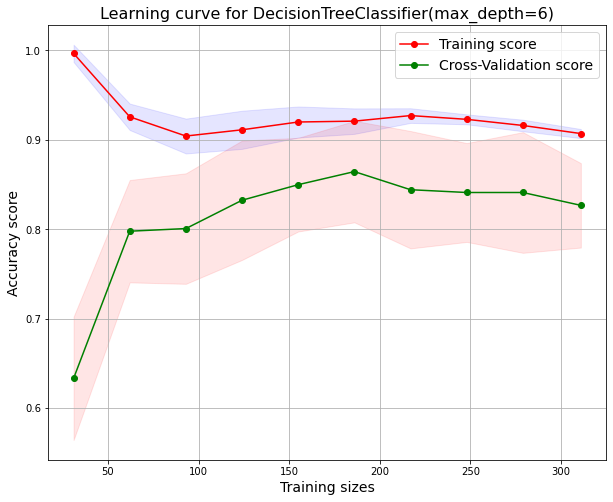

In [25]:
plot_learning_curve(clf_tree2, X_test, y_test, cv = 10, n_jobs = -1)

**WYKREŚLENIE KRZYWEJ UCZENIA DLA ALGORYTMU K NAJBLIŻSZYCH SĄSIADÓW Z OPTYMALNYMI HIPERPARAMETRAMI**

[learning_curve] Training set sizes: [ 31  62  93 124 155 186 217 248 279 311]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


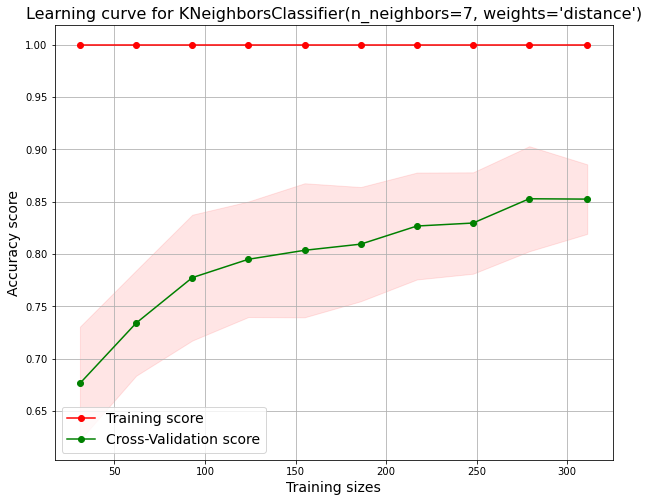

In [26]:
plot_learning_curve(clf_knn2, X_test, y_test, cv = 10, n_jobs = -1)

**WYKREŚLENIE KRZYWEJ UCZENIA DLA ALGORYTMU MLP (PERCEPTRON WIELOWARSTWOWY) Z OPTYMALNYMI HIPERPARAMETRAMI**

[learning_curve] Training set sizes: [ 31  62  93 124 155 186 217 248 279 311]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.6s finished


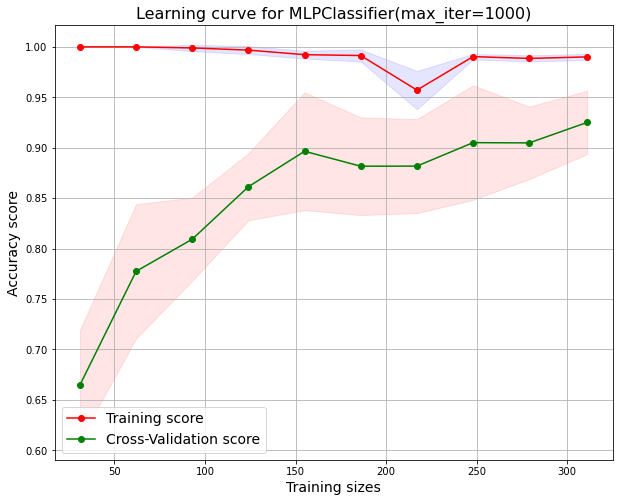

In [27]:
plot_learning_curve(clf_mlp2, X_test, y_test, cv = 10, n_jobs = -1)

**WYKREŚLENIE KRZYWEJ UCZENIA DLA ALGORYTMU ŁĄCZONEGO**

[learning_curve] Training set sizes: [ 31  62  93 124 155 186 217 248 279 311]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   55.8s finished


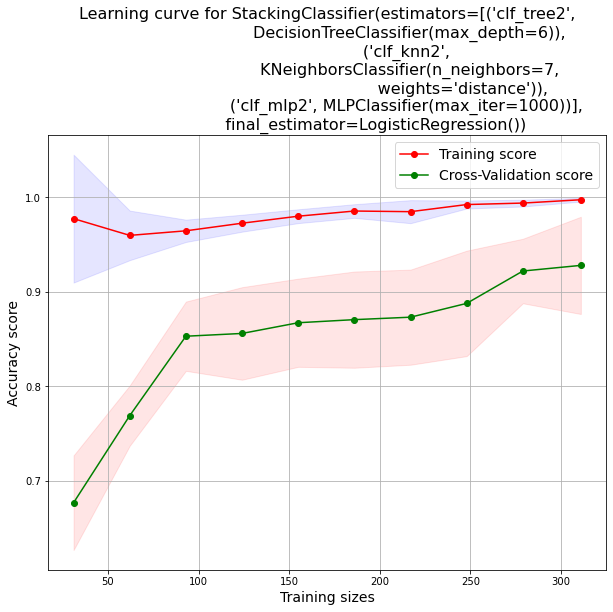

In [28]:
plot_learning_curve(stack_model, X_test, y_test, cv = 10, n_jobs = -1)